# Part II - (Ford GoBike: Who Rides and When?)
## by (Saud Albarkheel)

## Investigation Overview


This presentation highlights key insights from the February 2019 Ford GoBike dataset. The goal was to explore how different user types, age groups, and genders interact with the bike-sharing system — and when they ride.

## Dataset Overview and Executive Summary

The dataset includes 183,412 trip records from Ford GoBike in February 2019, covering start/end times, user type, gender, birth year, and station locations.

Key Insights:
Most users are Subscribers, riding mainly during rush hours.

Customers take longer trips, often during midday and weekends.

Riders identifying as “Other” gender ride longer on average.

Most trips last under 20 minutes and are taken by users aged 25–40.

Age, user type, and gender combined reveal deeper behavior patterns than any single variable alone.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Convert datetime columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create additional features
df['trip_duration_min'] = df['duration_sec'] / 60
df['age'] = 2019 - df['member_birth_year']

# Clean data: remove missing gender and birth year
df_clean = df.dropna(subset=['member_gender', 'member_birth_year'])

In [3]:
# Define a helper function to set axis labels and title
def set_labels(x_label, y_label, title):
    """
    Set the x and y axis labels and the plot title.

    Parameters:
    x_label (str): Label for x-axis
    y_label (str): Label for y-axis
    title (str): Title of the plot
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

## (Visualization 1): User Type Distribution


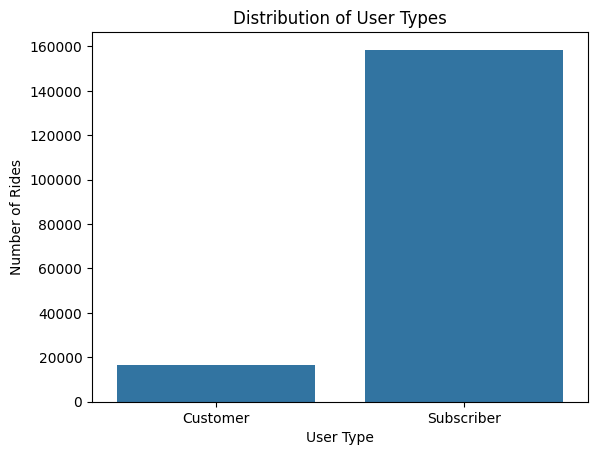

In [4]:
# User Type Distribution
sns.countplot(data=df_clean, x='user_type')
set_labels('User Type', 'Number of Rides', 'Distribution of User Types')
plt.show()

Subscribers make up the majority of users, showing that the service is mainly used for commuting rather than casual riding.

## (Visualization 2):Trip Duration by User Type



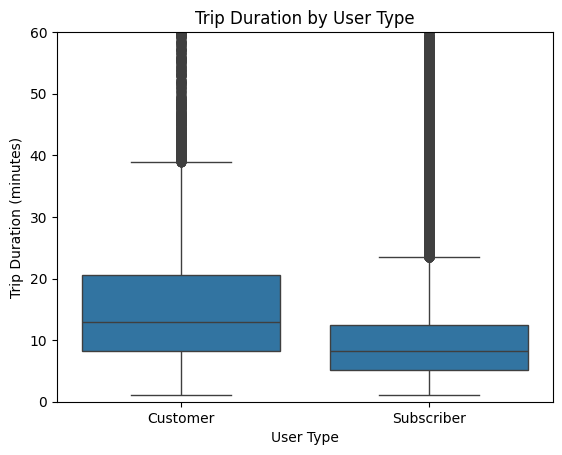

In [5]:
# Trip Duration by User Type
sns.boxplot(data=df_clean, x='user_type', y='trip_duration_min')
plt.ylim(0, 60)
set_labels('User Type', 'Trip Duration (minutes)', 'Trip Duration by User Type')
plt.show()

Customers take noticeably longer trips than Subscribers. This supports the idea that casual users ride for leisure or errands.



## (Visualization 3):Average Trip Duration by Gender and User Type



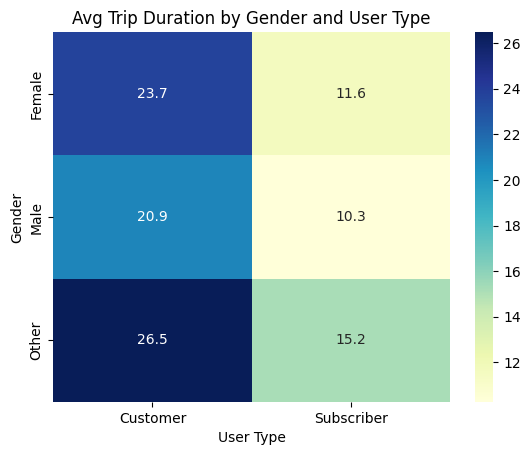

In [6]:
# Average Trip Duration by Gender and User Type (Heatmap)
pivot = df_clean.pivot_table(values='trip_duration_min', index='member_gender', columns='user_type', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
set_labels('User Type', 'Gender', 'Avg Trip Duration by Gender and User Type')
plt.show()

Riders identifying as “Other” gender and Customers tend to ride longer on average. Gender + user type provides more insight than either alone.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
